In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting logging to print only error messages from sklearn
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# Import warnings module
import warnings
warnings.filterwarnings("ignore") # Ignore warnings

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Shape and Types

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
cat_var = ["survived", "pclass", "sex", "sibsp", "embarked", "class", "who", "adult_male", "deck","embark_town", "alive","alone"]

In [7]:
# Convert to the correct data types
titanic[cat_var] = titanic[cat_var].astype("category")

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    category
 1   pclass       891 non-null    category
 2   sex          891 non-null    category
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    category
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    category
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    category
dtypes: category(12), float64(2), int64(1)
memory usage: 33.3 KB


In [9]:
# data shape
titanic.shape

(891, 15)

# Descriptive Statistics

In [10]:
titanic.describe()

,age,parch,fare
count,714.000000,891.000000,891.000000
mean,29.699118,0.381594,32.204208
std,14.526497,0.806057,49.693429
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,7.910400
50%,28.000000,0.000000,14.454200
75%,38.000000,0.000000,31.000000
max,80.000000,6.000000,512.329200


In [11]:
titanic.describe(include='category')

,survived,pclass,sex,sibsp,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,891,891,889,891,891,891,203,889,891,891
unique,2,3,2,7,3,3,3,2,7,3,2,2
top,0,3,male,0,S,Third,man,True,C,Southampton,no,True
freq,549,491,577,608,644,491,537,537,59,644,549,537


# Univariate Data Visualization

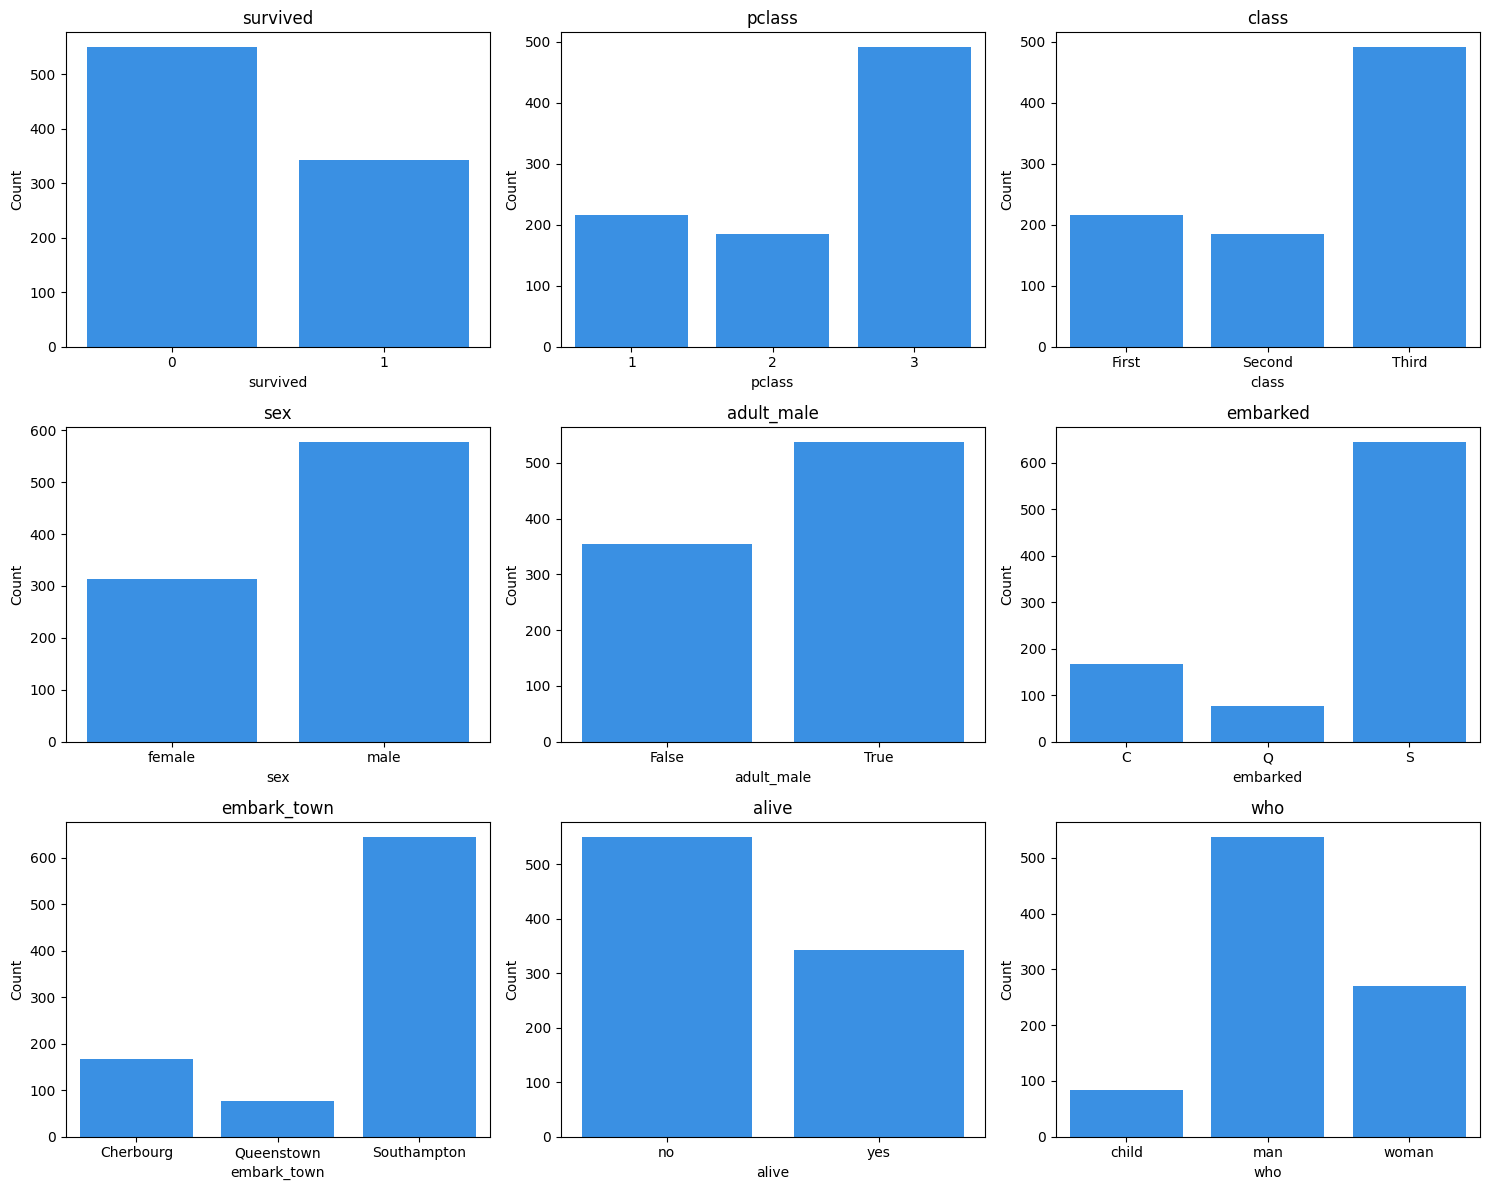

In [18]:
categorical_columns = ['survived', 'pclass', 'class', 'sex', 'adult_male',
                       'embarked', 'embark_town', 'alive', 'who']

# Grid 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=titanic, color='dodgerblue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

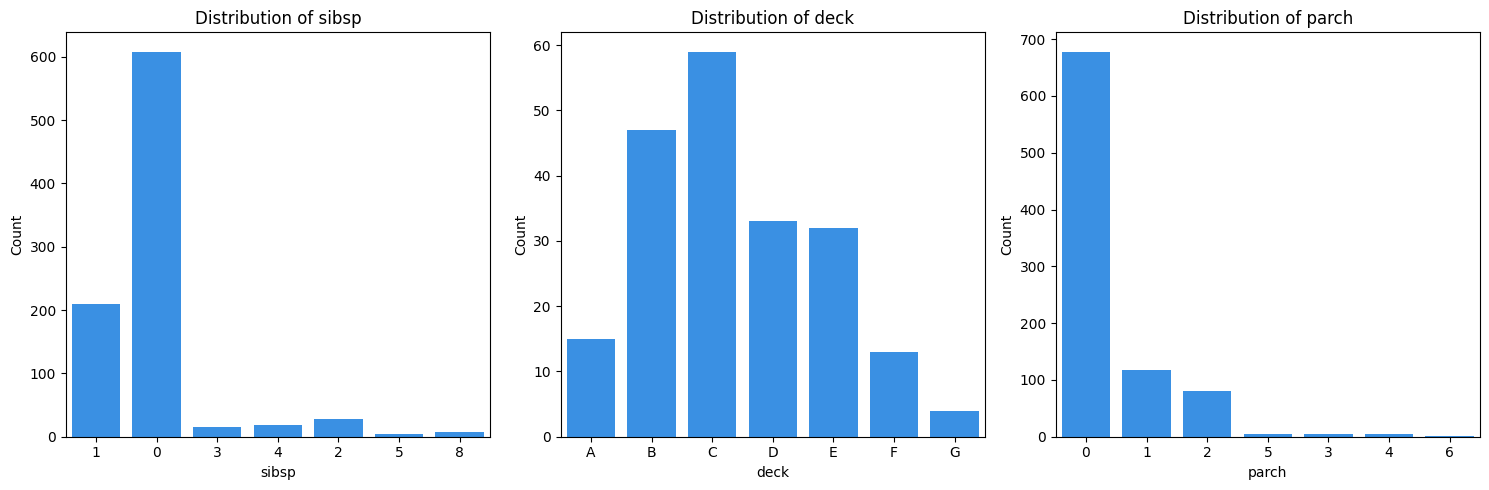

In [17]:
categorical_columns = ["sibsp", "deck", "parch"]

for col in ["sibsp", "parch"]:
    titanic[col] = titanic[col].astype(str)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=titanic, color='dodgerblue', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x')

plt.tight_layout()
plt.show()

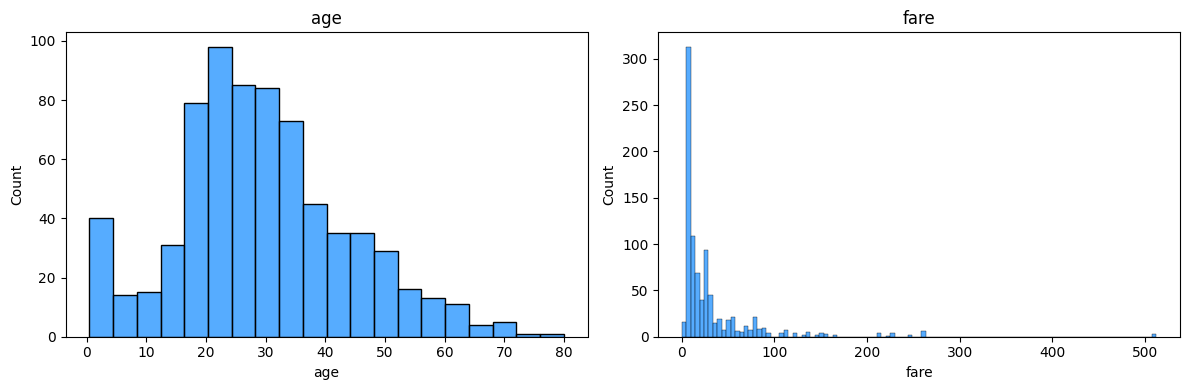

In [16]:
# Set up the matplotlib figure with 2 rows and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Flatten the 2D array of axes to 1D for easy iteration
axes = axes.flatten()

# Columns to plot
num_columns = ['age','fare']

# Create bar plots
for i, col in enumerate(num_columns):
    sns.histplot(data=titanic, x=col, color='dodgerblue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

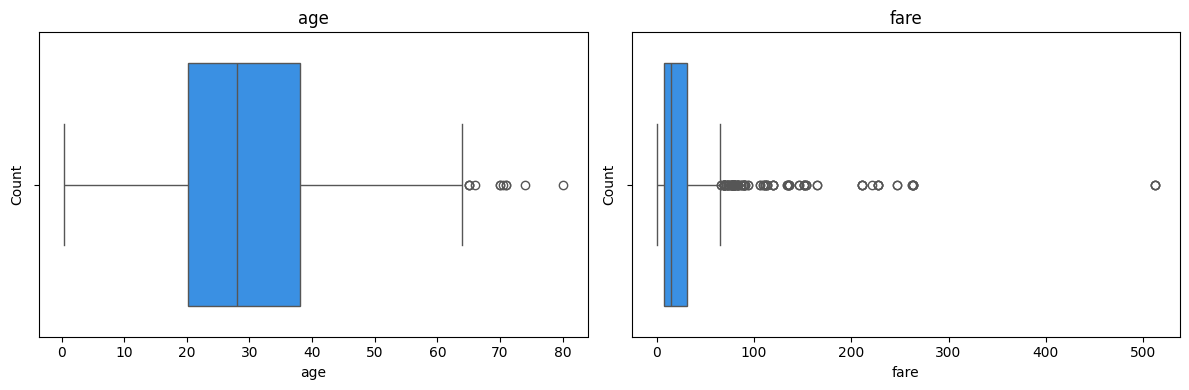

In [ ]:
# Set up the matplotlib figure with 2 rows and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Flatten the 2D array of axes to 1D for easy iteration
axes = axes.flatten()

# Columns to plot
num_columns = ['age','fare']

# Create bar plots
for i, col in enumerate(num_columns):
    sns.boxplot(data=titanic, x=col, color='dodgerblue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Handling Missing Values

In [19]:
titanic.columns[titanic.isnull().any()]

Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')

In [20]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


We have missing values in "Age", "embarked", "deck" and "embark_town"


In [21]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## Deck

- **"deck"** can't be dropped due to a large amount of missing. However, we can evaluate the relationship with the survive. If they have no relationship with each other, it can be dropped the entire column.

In [22]:
cont_table = pd.crosstab(titanic['deck'], titanic['alive'])

# print the contingency table
cont_table

alive,no,yes
deck,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2


<Axes: xlabel='deck'>

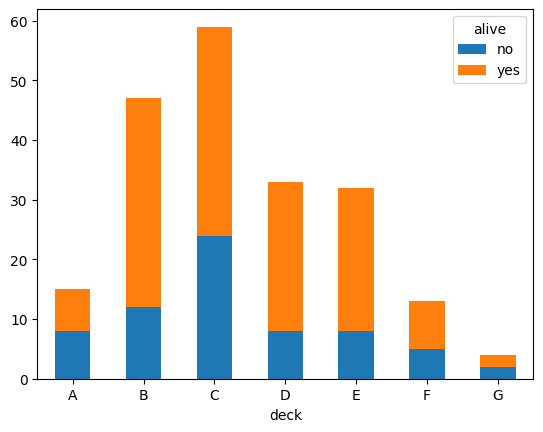

In [23]:
cont_table.plot(kind="bar", stacked=True, rot=0)

In [24]:
import scipy.stats as stats
contingency_table = pd.crosstab(titanic['deck'], titanic['survived'])

# H0: independent
# H1: dependent
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi-square statistic: 8.332153573386202
P-value: 0.21476470552598992
Degrees of Freedom: 6


There is no relationship between the passenger deck and their survive. Therefore, in this case, the variable "deck" can be dropped.

In [25]:
titanic = titanic.drop(columns=["deck"])

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## embarked and embark_town
- **"embarked"** and "embark_town" are the same. However, there are only two rows with missing values. Thus, these missing can be dropped.

In [27]:
# Identify rows where 'embarked' is missing
missing_embarked = titanic[titanic['embarked'].isna()]

# Identify rows where 'embark_town' is missing
missing_embark_town = titanic[titanic['embark_town'].isna()]


In [28]:
missing_embarked

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [29]:
missing_embark_town

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [30]:
titanic = titanic.dropna(subset=['embarked'])

In [31]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# Age
- **"age"** can be filled with predicted values (which should be shown in Week 3 when students are able to perform regression) or by using the mean age of the corresponding class—either survived or dead—based on its row.

We can check the relationship of "Age" and other variables to decide how should we handle missing values in this feature.

In [32]:
from scipy import stats
# H0: equal means
# H1: different means
stats.ttest_ind(titanic[titanic['survived'] == 1]['age'], titanic[titanic['survived'] == 0]['age'], nan_policy='omit')

TtestResult(statistic=np.float64(-2.2043427748445956), pvalue=np.float64(0.027820316250851285), df=np.float64(710.0))

In [33]:
titanic[titanic['survived'] == 1]['age'].mean()

np.float64(28.19329861111111)

In [34]:
titanic[titanic['survived'] == 0]['age'].mean()

np.float64(30.62617924528302)

<Axes: xlabel='age', ylabel='Count'>

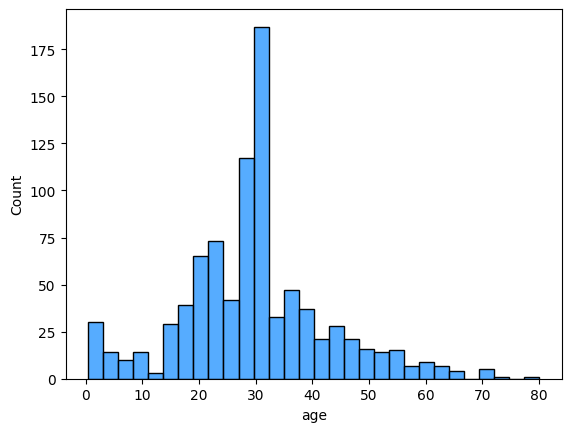

In [37]:
sns.histplot(data=titanic, x="age", color='dodgerblue')

In [36]:
# Get the mean of "age" for each class of survived
age_mean_0 = titanic.loc[titanic["survived"] == 0, "age"].mean()
age_mean_1 = titanic.loc[titanic["survived"] == 1, "age"].mean()

# fill missing values
titanic.loc[(titanic["survived"] == 0) & (titanic["age"].isnull()), "age"] = age_mean_0
titanic.loc[(titanic["survived"] == 1) & (titanic["age"].isnull()), "age"] = age_mean_1

# Dealing with outliers

In [38]:
def remove_outlier(df, numeric_columns,threshold=1.5):
  df_no_outliers = df.copy()

  for column in numeric_columns:
    # Calculate IQR
    Q1 = df_no_outliers[column].quantile(0.25)
    Q3 = df_no_outliers[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper bound and lower bound
    lower_bound = Q1 - threshold*IQR
    upper_bound = Q3 + threshold*IQR

    # Remove Outliers
    df_no_outliers = df_no_outliers[(df_no_outliers[column]>=lower_bound)
    & (df_no_outliers[column]<=upper_bound)]

  return df_no_outliers

In [39]:
num_col = ['age','fare']
titanic = remove_outlier(titanic,num_col)

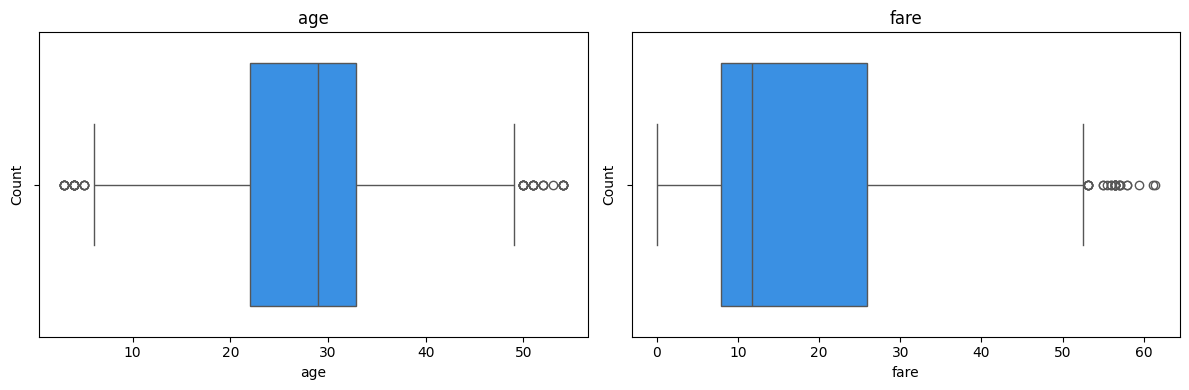

In [40]:
# Set up the matplotlib figure with 2 rows and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Flatten the 2D array of axes to 1D for easy iteration
axes = axes.flatten()

# Columns to plot
num_columns = ['age','fare']

# Create bar plots
for i, col in enumerate(num_columns):
    sns.boxplot(data=titanic, x=col, color='dodgerblue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

# Drop Unused columns

In [41]:
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,Southampton,no,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,yes,True


In [42]:
column_to_drop = ["alive", "class", "adult_male", "sex", "embark_town", "alone"]

In [43]:
titanic.drop(columns=column_to_drop, inplace=True)

In [44]:
titanic.head(2)

,survived,pclass,age,sibsp,parch,fare,embarked,who
0,0,3,22.0,1,0,7.250,S,man
2,1,3,26.0,0,0,7.925,S,woman


# Category Encoding

In [45]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [46]:
# categorical columns to transform
cat_cols = ["embarked", "who"]

# fit an encoder and transform the trainset
cat_vals = titanic[cat_cols]
cat_vals

,embarked,who
0,S,man
2,S,woman
3,S,woman
4,S,man
5,Q,man
...,...,...
886,S,man
887,S,woman
888,S,woman
889,C,man


In [47]:
# Fit and transform the categorical values
transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

array([[0., 1., 1., 0.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.]])

In [48]:
# the names of the new columns
new_col_names = one_hot_encoder.get_feature_names_out(cat_cols)
new_col_names

array(['embarked_Q', 'embarked_S', 'who_man', 'who_woman'], dtype=object)

In [49]:
# put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    titanic[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the trainset
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,who,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.000000,1,0,7.2500,S,man,0.0,1.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,S,woman,0.0,1.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,S,woman,0.0,1.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,S,man,0.0,1.0,1.0,0.0
5,0,3,30.626179,0,0,8.4583,Q,man,1.0,0.0,1.0,0.0


In [50]:
# delete the original categorical columns
titanic = titanic.drop(cat_cols, axis=1)

In [51]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked_Q,embarked_S,who_man,who_woman
0,0,3,22.000000,1,0,7.2500,0.0,1.0,1.0,0.0
2,1,3,26.000000,0,0,7.9250,0.0,1.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,0.0,1.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,1.0,0.0
5,0,3,30.626179,0,0,8.4583,1.0,0.0,1.0,0.0


# Data Splitting

In [52]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']


# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=19)

In [53]:
y_train.head()

,survived
485,0
572,1
868,0
459,0
66,1


In [54]:
X_train.head()

,pclass,age,sibsp,parch,fare,embarked_Q,embarked_S,who_man,who_woman
485,3,30.626179,3,1,25.4667,0.0,1.0,0.0,1.0
572,1,36.000000,0,0,26.3875,0.0,1.0,1.0,0.0
868,3,30.626179,0,0,9.5000,0.0,1.0,1.0,0.0
459,3,30.626179,0,0,7.7500,1.0,0.0,1.0,0.0
66,2,29.000000,0,0,10.5000,0.0,1.0,0.0,1.0


In [55]:
# Save the column names for later use
feature_names = X_train.columns
feature_names

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked_Q', 'embarked_S',
       'who_man', 'who_woman'],
      dtype='object')

# Scaling

In [56]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
Xtrain = X_train_scaled
Xtest = X_test_scaled
ytrain = y_train
ytest = y_test

In [58]:
Xtrain, Xtest

(array([[ 0.66779311,  0.20591996,  2.9534965 , ...,  0.58405607,
         -1.34164079,  1.62973954],
        [-2.14036255,  0.73108683, -0.4875867 , ...,  0.58405607,
          0.74535599, -0.61359498],
        [ 0.66779311,  0.20591996, -0.4875867 , ...,  0.58405607,
          0.74535599, -0.61359498],
        ...,
        [-0.73628472,  1.80608278, -0.4875867 , ...,  0.58405607,
          0.74535599, -0.61359498],
        [ 0.66779311, -0.24618222, -0.4875867 , ...,  0.58405607,
         -1.34164079,  1.62973954],
        [-0.73628472, -0.53936293,  1.80646876, ...,  0.58405607,
          0.74535599, -0.61359498]]),
 array([[ 0.66779311,  0.20591996, -0.4875867 , ...,  0.58405607,
          0.74535599, -0.61359498],
        [ 0.66779311,  0.20591996,  2.9534965 , ...,  0.58405607,
         -1.34164079,  1.62973954],
        [ 0.66779311, -0.73481674, -0.4875867 , ...,  0.58405607,
          0.74535599, -0.61359498],
        ...,
        [ 0.66779311, -0.24618222, -0.4875867 , ...,  

In [59]:
ytrain, ytest

(485    0
 572    1
 868    0
 459    0
 66     1
       ..
 756    0
 346    1
 586    0
 315    1
 529    0
 Name: survived, Length: 574, dtype: category
 Categories (2, int64): [0, 1],
 304    0
 229    0
 623    0
 178    0
 531    0
       ..
 677    1
 431    1
 2      1
 321    0
 91     0
 Name: survived, Length: 144, dtype: category
 Categories (2, int64): [0, 1])

# Citing this notebook
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Machine Learning for Business. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-451---Machine-Learning-for-Business-Analytics/upload
